In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

# Task 1

In [2]:
# Read data
df = pd.read_csv('task-1.csv')
print(df.shape)
df.head()

(50, 2)


,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


In [3]:
# Create x, y
x = np.log(df.x.values)
y = df.y.values

In [4]:
# fit polynomial of degree one
coefs = np.polyfit(x, y, deg=1)
x_values = np.linspace(min(x), max(x), num=100)
y_values = np.polyval(coefs, x_values)

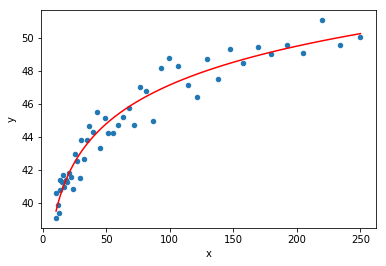

In [5]:
# plot the data and the fitting curve
df.plot.scatter(x='x', y='y')
plt.plot(np.exp(x_values), y_values, c='r')
plt.show()

In [6]:
# Compute RSS
def RSS(y_pred, y):
    return np.sum(np.square(y-y_pred))

In [7]:
# RSS model
y_pred = np.polyval(coefs, x)
rss_model = RSS(y_pred, y)
print('RSS model:', rss_model)

RSS model: 31.842651752756687


In [8]:
# RSS baseline
rss_baseline = RSS(y, y.mean())
print('RSS baseline:', rss_baseline)

RSS baseline: 541.1432872199999


In [9]:
# R^2 coefficient
R2 = 1-(rss_model/rss_baseline)
print('R^2 coefficient:', R2)

R^2 coefficient: 0.9411567093138288


# Task 2

In [10]:
# Read data
df = pd.read_csv('task-2.csv')
print(df.shape)
df.head()

(1000, 4)


,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604


In [11]:
# Create X, y
X = df.drop(columns='y').values
y = df.y.values

In [12]:
# Split dataset
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=0)

## Fit linear regression with outliers

In [13]:
lr = LinearRegression()
lr.fit(X_tr, y_tr)
lr.predict(X_te)
print('MAE lr with outliers: {:.3f}'.format(MAE(y_te, lr.predict(X_te))))

MAE lr with outliers: 104.788


## Fit Huber regression with outliers

In [14]:
huber = HuberRegressor()
huber.fit(X_tr, y_tr)
huber.predict(X_te)
print('MAE Huber with outliers: {:.3f}'.format(MAE(y_te, huber.predict(X_te))))

MAE Huber with outliers: 83.908


## Fit linear regression without outliers

In [15]:
# Compute z-scores
z_scores = (X_tr - np.mean(X_tr, axis=0))/np.std(X_tr, axis=0)

In [16]:
# find outliers in each feature
threshold = 2
idx = np.abs(z_scores) < threshold
idx_rows = idx.all(axis=1)

In [17]:
# training dataset without outliers
X_tr2 = X_tr[idx_rows, :]
y_tr2 = y_tr[idx_rows]
print('Number of outliers:', X_tr.shape[0]-X_tr2.shape[0])
print('% of outliers:', (X_tr.shape[0]-X_tr2.shape[0])/X_tr.shape[0]*100.)

Number of outliers: 45
% of outliers: 5.625


In [18]:
lr2 = LinearRegression()
lr2.fit(X_tr2, y_tr2)
lr2.predict(X_te)
print('MAE lr without outliers: {:.3f}'.format(MAE(y_te, lr2.predict(X_te))))

MAE lr without outliers: 69.303
